# Demand Prediction Linear Regression Problem

## Table of Content 

* Business problem
* Data Dictionnary
* EDA 
* Data vizualisation 
* Simple Linear regression analysis 
* Multiple Linear regression analysis & Modeling 
* Conclusion 

## Business Problem

The following dataset contains many variables attempting to explain the variations of demand of bikes of a bike rental company. The dependant variables representing the demand is *cnt*. We are trying to identify what independent variables can explain the demand of bikes, our two main objectives are :
* Classify the significance of datas responsible of changes of demand
* How well those variables describe bike demand 

## Explanatory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [5]:
df = pd.read_csv(r"C:\Users\dolly.chakraborty\Downloads\day (2).csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [7]:
df_final=df.drop(["dteday", "registered", "casual"],axis=1)

## Data Vizualisation

How is the demand of bike is distributed ?

C:\Users\dolly.chakraborty\AppData\Local\Temp\ipykernel_18204\2598836571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final["cnt"],kde=True)


<Axes: xlabel='cnt', ylabel='Density'>

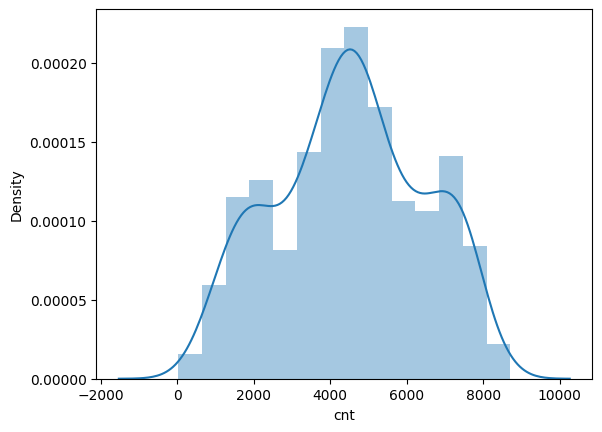

In [8]:
sns.distplot(df_final["cnt"],kde=True)

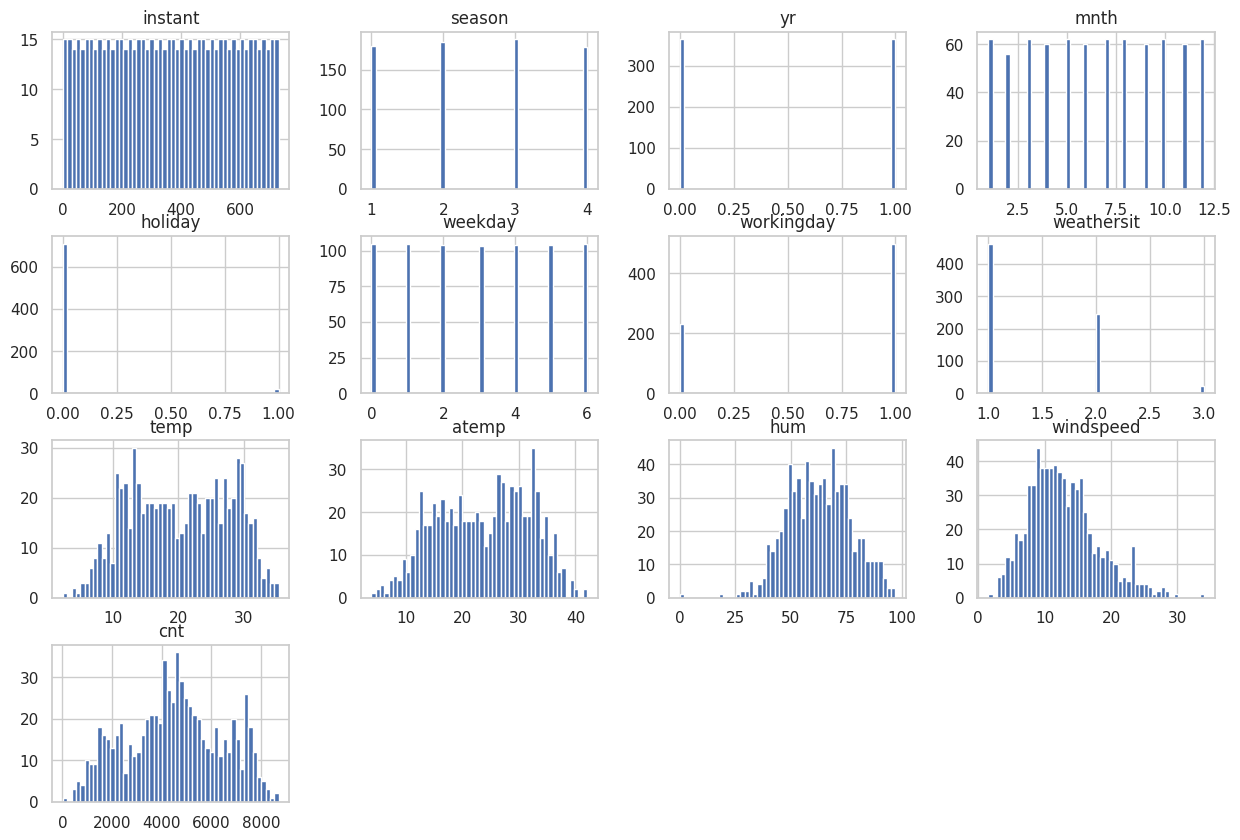

In [8]:
df_final.hist(bins=50, figsize=(15,10))
plt.savefig("attribute_histogram_plots")
plt.show()

Text(0.5, 1.0, 'Correlation plot between variables (before filtering statistical significance)')

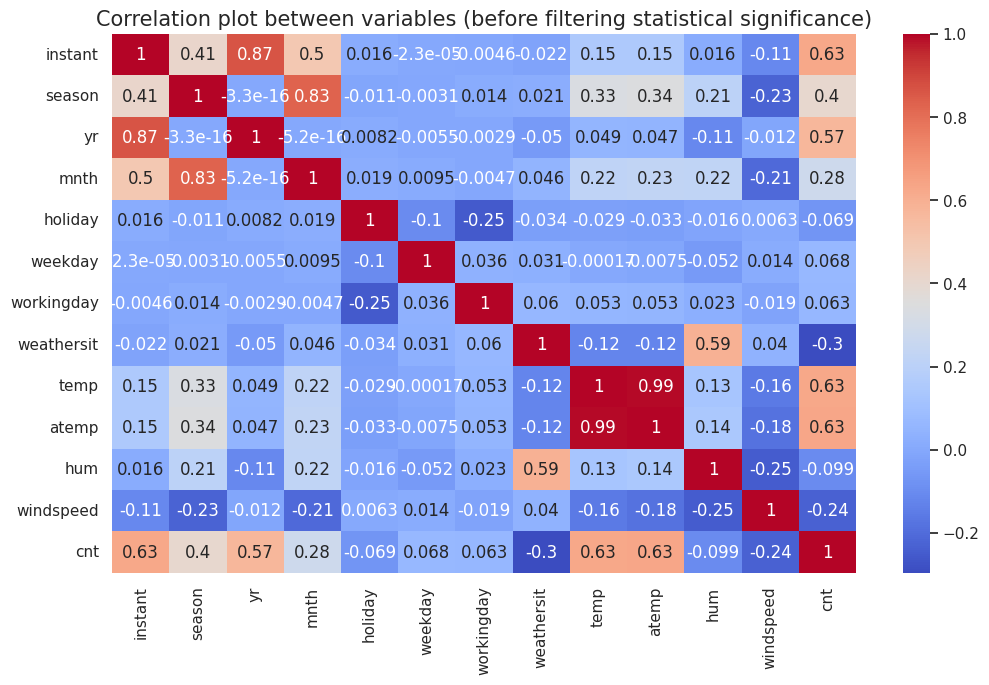

In [9]:
corr = df_final.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot = True, cmap="coolwarm")
plt.title("Correlation plot between variables (before filtering statistical significance)", fontsize=15)

Before filtering datas by satistical significance, our top 3 independent variables explaining changes of bike demands are :
* 1st : temp/atemp/instant (+0.63)
* 2nd : yr (+0.57)
* 3rd : seasosn (+0.4)

For the next few plots, the floats will be replaced by decriptions in string to make the plot easier to read

In [9]:
 df_season = df_final.replace({'season' : { 1.0 : 'Spring', 2.0 : 'Summer',
                                    3.0 : 'Fall', 4.0 : 'Winter' }})

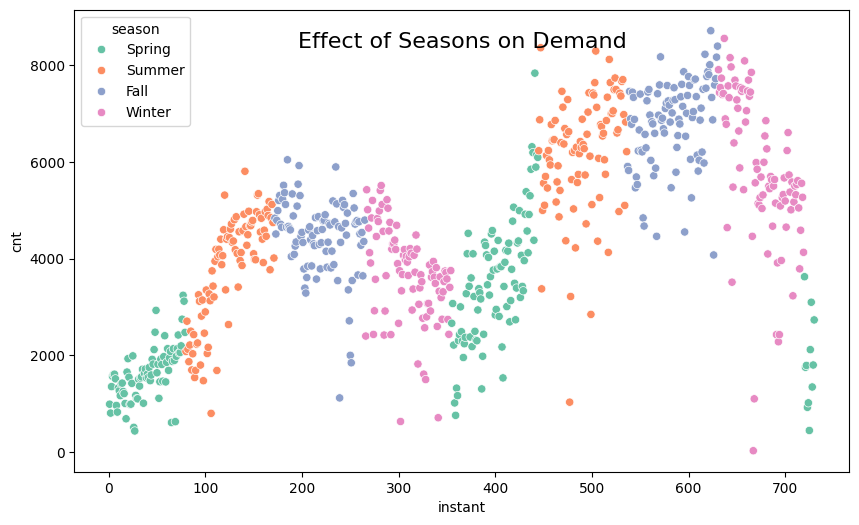

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_season, x='instant', y='cnt', hue='season', palette='Set2')
plt.title("Effect of Seasons on Demand", fontsize=16, y=0.9)
plt.show()

In [16]:
 df_year = df_final.replace({'yr' : { 0 : '2018', 1 : '2019' }})

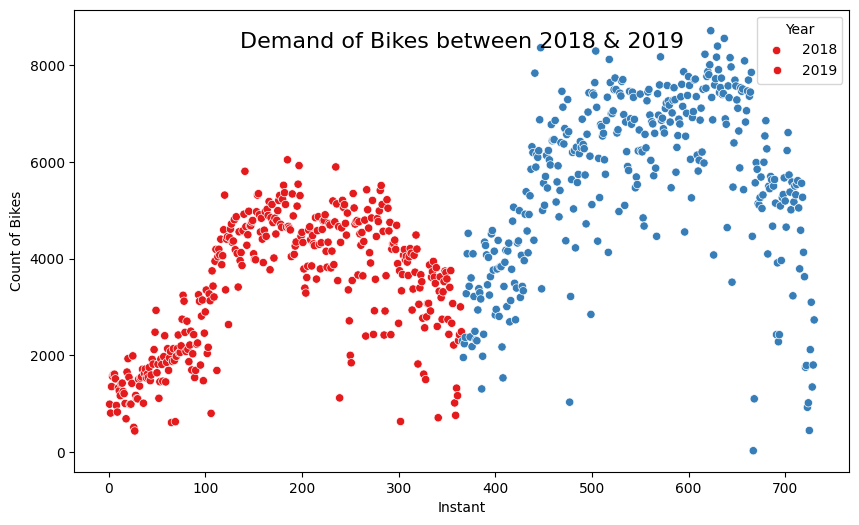

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_year, x="instant", y="cnt", hue="yr", palette="Set1")
plt.title("Demand of Bikes between 2018 & 2019", fontsize=16, y=0.9)
plt.xlabel("Instant")
plt.ylabel("Count of Bikes")
plt.legend(title="Year", labels=["2018", "2019"])
plt.show()

In [12]:
 df_weather = df_final.replace({'weathersit' : { 1 : 'Clear', 2 : 'Cloudy',
                                          3 : 'Small rain', 4 : 'Heavy rain'}})

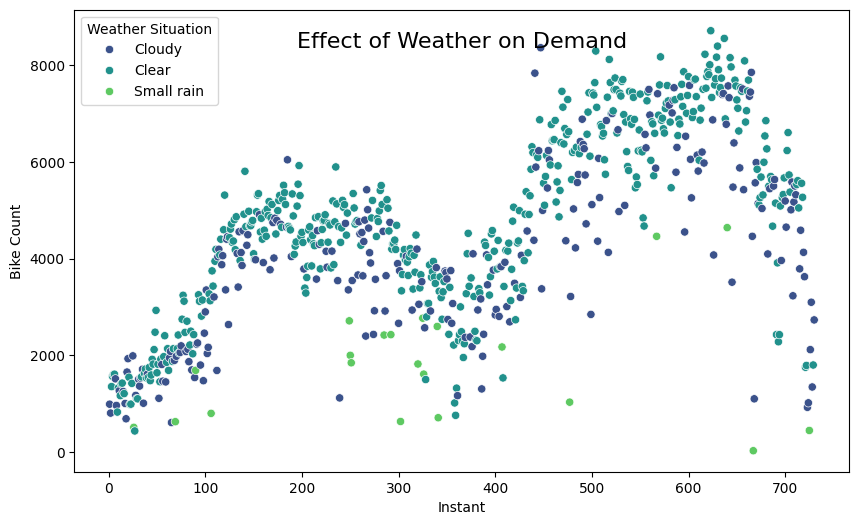

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_weather, x="instant", y="cnt", hue="weathersit", palette="viridis")
plt.title("Effect of Weather on Demand", fontsize=16, y=0.9)
plt.xlabel("Instant")
plt.ylabel("Bike Count")
plt.legend(title="Weather Situation")
plt.show()

In [19]:
df_working = df_final.replace({'workingday' : { 1 : 'Working day', 0 : 'Day-off'}})

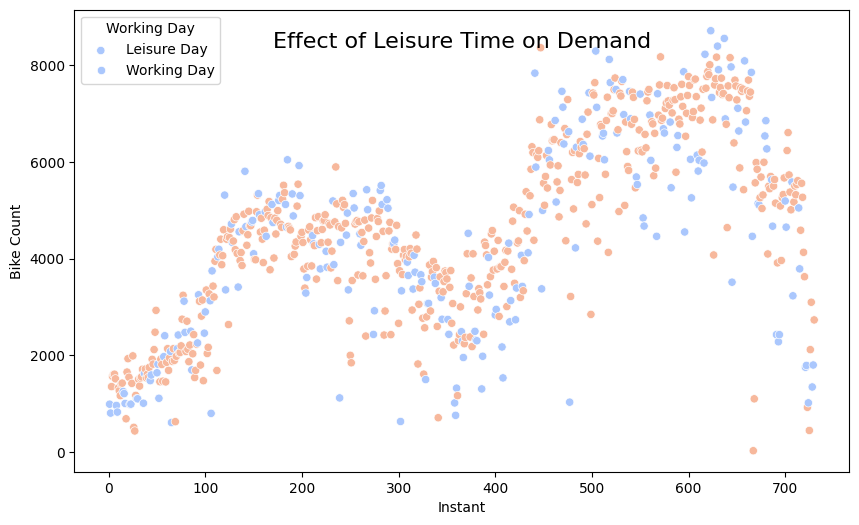

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_working, x="instant", y="cnt", hue="workingday", palette="coolwarm", legend="full")
plt.title("Effect of Leisure Time on Demand", fontsize=16, y=0.9)
plt.xlabel("Instant")
plt.ylabel("Bike Count")
plt.legend(title="Working Day", labels=["Leisure Day", "Working Day"])
plt.show()

In [21]:
df_months = df_final.replace({'mnth' : { 1 : 'January', 2 : 'February',
                                 3 : 'March', 4 : 'April', 5 : 'May',
                                 6 : 'June', 7 : 'July', 8 : 'August',
                                 9 : 'September', 10 : 'October', 
                                  11 : 'November', 12 : 'December'}})

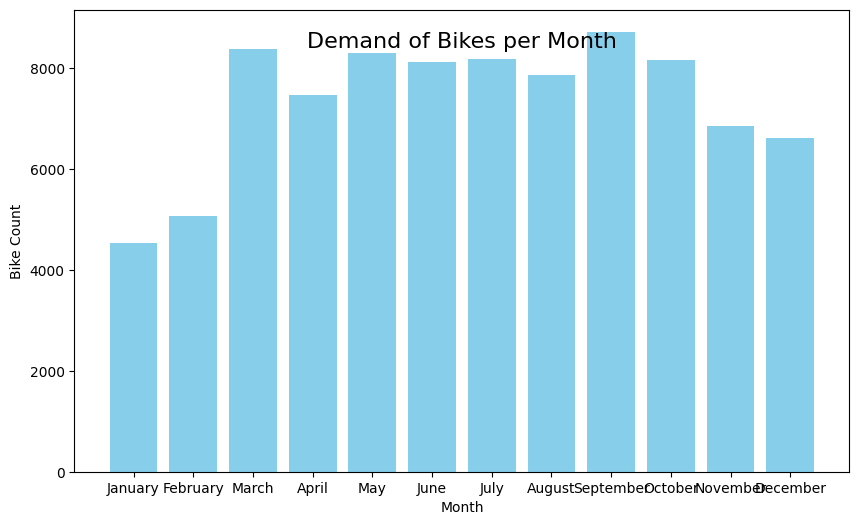

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(df_months['mnth'], df_months['cnt'], color='skyblue')
plt.title("Demand of Bikes per Month", fontsize=16, y=0.9)
plt.xlabel("Month")
plt.ylabel("Bike Count")
plt.show()

In [24]:
df_days = df_final.replace({'weekday' : { 6 : 'Sunday', 0 : 'Monday', 1 : 'Tuesday',
                                 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday',
                                 5 : 'Saturday'}})

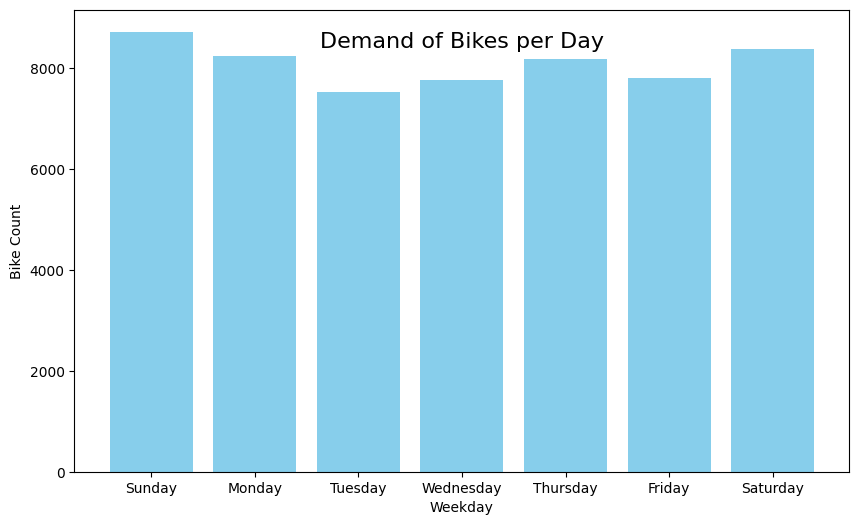

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(df_days['weekday'], df_days['cnt'], color='skyblue')
plt.title("Demand of Bikes per Day", fontsize=16, y=0.9)
plt.xlabel("Weekday")
plt.ylabel("Bike Count")
plt.show()

## Simple Linear regression analysis 


We would like to know what relationship do every independant variables have with the dependant varibables and how can we measure the linearity of their relationship.

In [22]:
corr_matrix = df_final.corr()
corr_matrix["cnt"].sort_values(ascending = False)

cnt           1.000000
atemp         0.630685
instant       0.629896
temp          0.627044
yr            0.569728
season        0.404584
mnth          0.278191
weekday       0.067534
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
weathersit   -0.295929
Name: cnt, dtype: float64

In [23]:
### Time and demand

In [24]:
X = df_final.instant 
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     478.8
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.84e-82
Time:                        04:36:22   Log-Likelihood:                -6375.8
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     728   BIC:                         1.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2394.3499    111.497     21.475      0.0

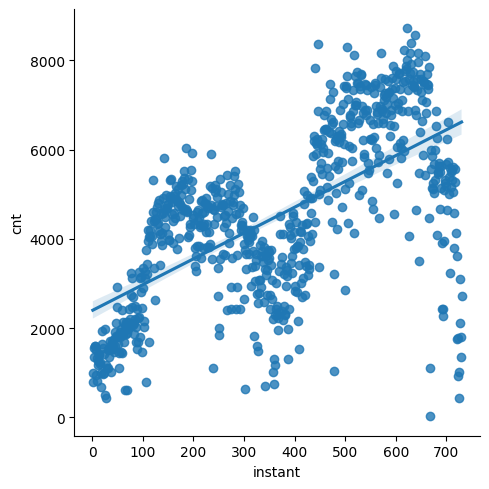

In [26]:
sns.lmplot(x="instant", y="cnt", data=df_final)

In [26]:
### Time and seasons

In [27]:
X = df_final.season
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.01e-30
Time:                        04:36:23   Log-Likelihood:                -6495.0
No. Observations:                 730   AIC:                         1.299e+04
Df Residuals:                     728   BIC:                         1.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2745.1239    161.587     16.988      0.0

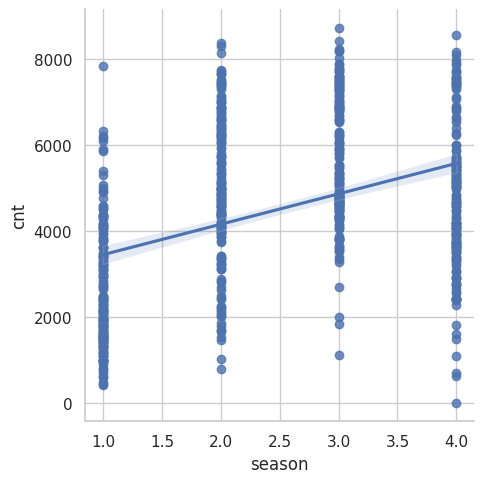

In [28]:
sns.lmplot(x="season", y="cnt", data=df_final)

In [29]:
### Years and demand 

In [30]:
X = df_final.yr
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     349.9
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.75e-64
Time:                        04:36:24   Log-Likelihood:                -6417.0
No. Observations:                 730   AIC:                         1.284e+04
Df Residuals:                     728   BIC:                         1.285e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3405.7616     83.338     40.867      0.0

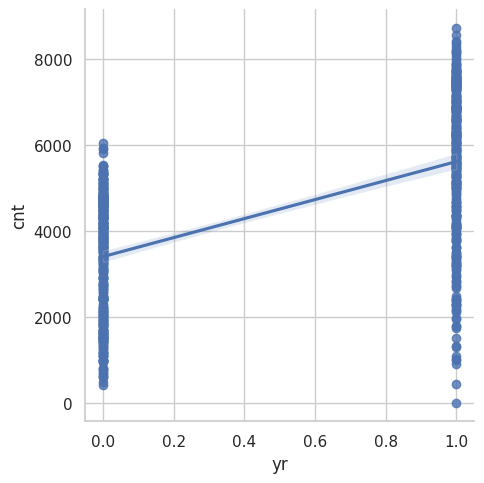

In [31]:
sns.lmplot(x="yr", y="cnt", data=df_final)

In [32]:
### months and demand

In [33]:
X = df_final.mnth
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     61.07
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.93e-14
Time:                        04:36:25   Log-Likelihood:                -6530.8
No. Observations:                 730   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3489.2897    147.438     23.666      0.0

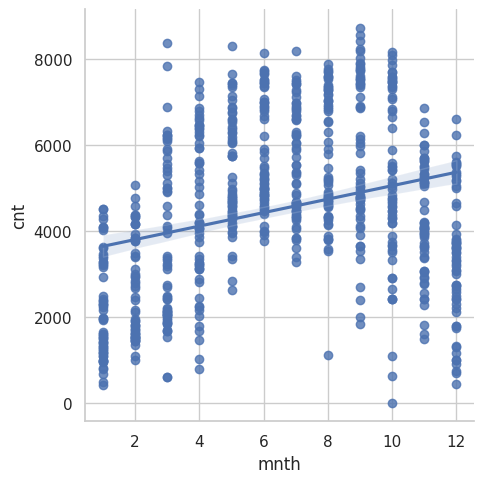

In [34]:
sns.lmplot(x="mnth", y="cnt", data=df_final)

In [35]:
### Holiday and demand

In [36]:
X = df_final.holiday
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.459
Date:                Mon, 15 May 2023   Prob (F-statistic):             0.0633
Time:                        04:36:26   Log-Likelihood:                -6558.5
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4530.9027     72.586     62.421      0.0

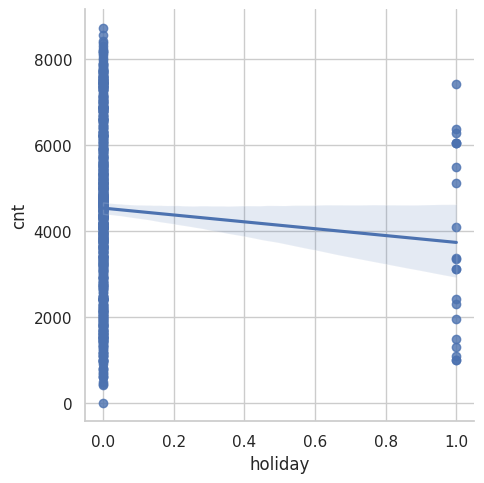

In [37]:
sns.lmplot(x="holiday", y="cnt", data=df_final)

In [38]:
### Days of the week and demand

In [39]:
X = df_final.weekday
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.336
Date:                Mon, 15 May 2023   Prob (F-statistic):             0.0682
Time:                        04:36:27   Log-Likelihood:                -6558.6
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4312.6676    128.677     33.515      0.0

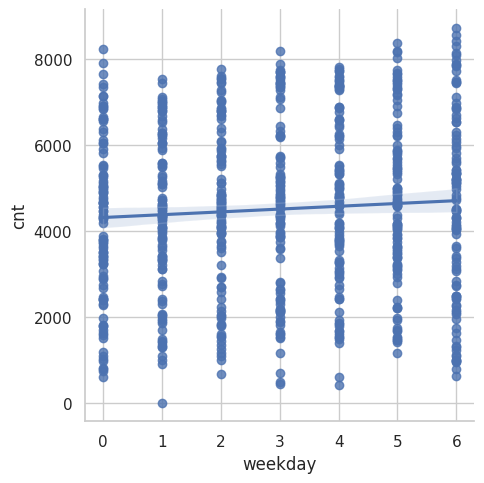

In [40]:
sns.lmplot(x="weekday", y="cnt", data=df_final)

In [41]:
### Working day or day off and demand

In [42]:
X = df_final.workingday
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.859
Date:                Mon, 15 May 2023   Prob (F-statistic):             0.0913
Time:                        04:36:28   Log-Likelihood:                -6558.8
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4330.1688    127.218     34.037      0.0

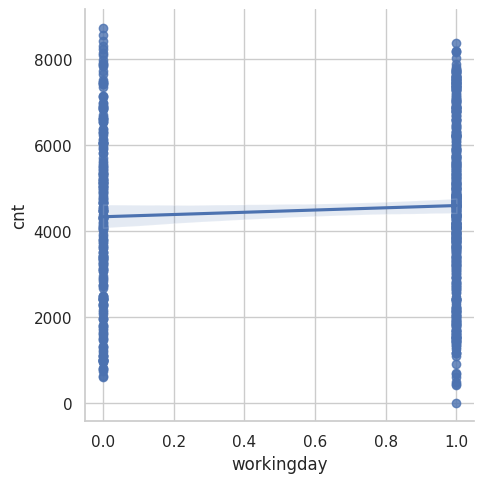

In [43]:
sns.lmplot(x="workingday", y="cnt", data=df_final)

In [44]:
### weather situation and demand

In [45]:
X = df_final.weathersit
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.20e-16
Time:                        04:36:28   Log-Likelihood:                -6526.8
No. Observations:                 730   AIC:                         1.306e+04
Df Residuals:                     728   BIC:                         1.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5974.4897    188.334     31.723      0.0

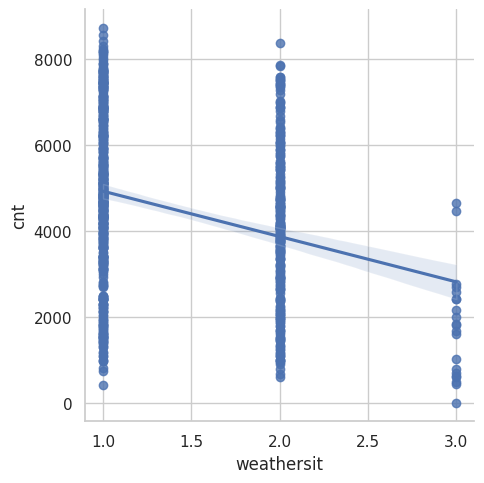

In [46]:
sns.lmplot(x="weathersit", y="cnt", data=df_final)

In [47]:
### temperature and demand

In [48]:
X = df_final.temp
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     471.7
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.07e-81
Time:                        04:36:29   Log-Likelihood:                -6377.9
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     728   BIC:                         1.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1222.0403    161.278      7.577      0.0

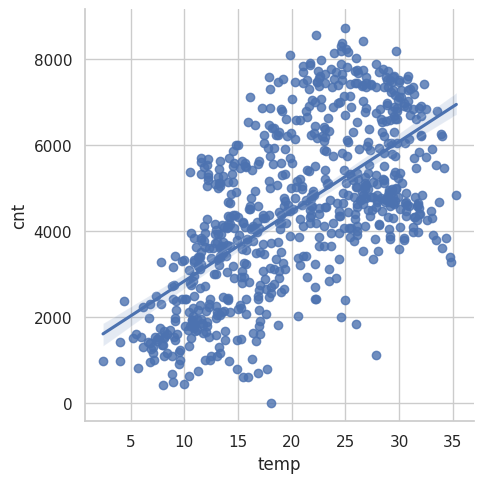

In [49]:
sns.lmplot(x="temp", y="cnt", data=df_final)

In [50]:
### Feeling temperature and demand

In [51]:
X = df_final.atemp
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     480.8
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.20e-82
Time:                        04:36:30   Log-Likelihood:                -6375.2
No. Observations:                 730   AIC:                         1.275e+04
Df Residuals:                     728   BIC:                         1.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        953.5184    171.385      5.564      0.0

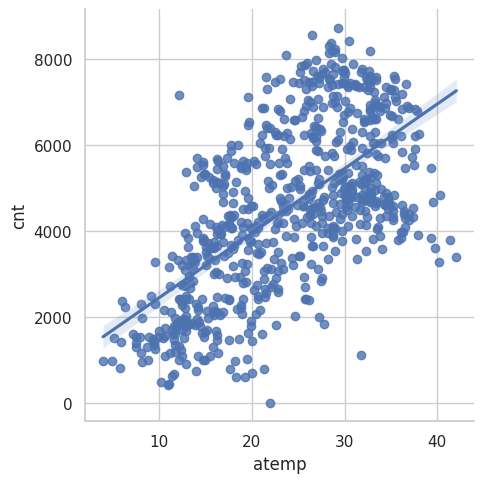

In [52]:
sns.lmplot(x="atemp", y="cnt", data=df_final)

In [53]:
### humidity and demand

In [54]:
X = df_final.hum
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.139
Date:                Mon, 15 May 2023   Prob (F-statistic):            0.00771
Time:                        04:36:31   Log-Likelihood:                -6556.7
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5349.0446    322.765     16.573      0.0

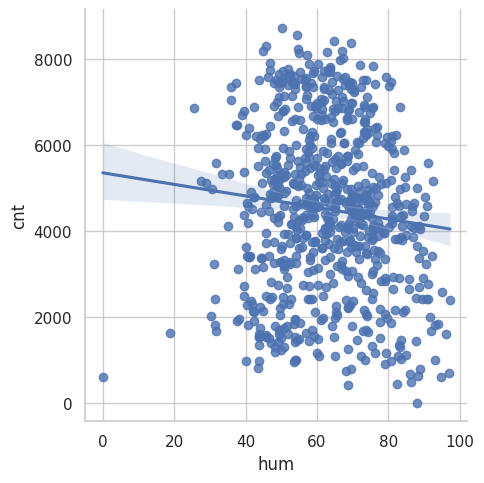

In [55]:
sns.lmplot(x="hum", y="cnt", data=df_final)

In [56]:
### Windspeed and demand

In [57]:
X = df_final.windspeed
y = df_final.cnt

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     42.60
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.26e-10
Time:                        04:36:32   Log-Likelihood:                -6539.5
No. Observations:                 730   AIC:                         1.308e+04
Df Residuals:                     728   BIC:                         1.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5626.2562    184.954     30.420      0.0

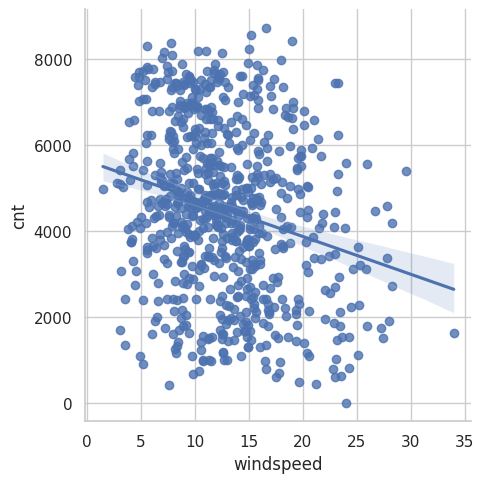

In [58]:
sns.lmplot(x="windspeed", y="cnt", data=df_final)

##  Multiple Linear regression analysis & Modeling 


In [59]:
X = df_final.loc[:, df_final.columns != "cnt"]
y = df_final.loc[:, df_final.columns == "cnt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("length of the total data is ",len(X))
print("length of the train data is ",len(X_train))
print("length of the test data is is ",len(X_test))

length of the total data is  730
length of the train data is  511
length of the test data is is  219


In [60]:
data_final_vars=df_final.columns.values.tolist()
y1=["cnt"]
X1=[i for i in data_final_vars if i not in y1]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [61]:
cols=["instant", "yr", "mnth", "holiday", "weekday", 
      "workingday", "temp", "atemp", "hum", "windspeed"] 
X=X_train[cols]
y=y_train["cnt"]
print("length of the train data is ",len(X))

length of the train data is  511


In [62]:
import statsmodels.api as st
X1 = st.add_constant(X)
lin_model=st.OLS(y,X1)
result=lin_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.748     
Dependent Variable: cnt              AIC:                8493.0620 
Date:               2023-05-15 04:36 BIC:                8539.6621 
No. Observations:   511              Log-Likelihood:     -4235.5   
Df Model:           10               F-statistic:        152.3     
Df Residuals:       500              Prob (F-statistic): 9.48e-145 
R-squared:          0.753            Scale:              9.4724e+05
-------------------------------------------------------------------
              Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
const       1246.8472  354.3628  3.5186 0.0005   550.6235 1943.0709
instant       -5.9567    4.9623 -1.2004 0.2306   -15.7063    3.7929
yr          4118.2749 1813.7935  2.2705 0.0236   554.6788 7681.8710
mnth         273.6730  151.5254  1.8061 0.0715   -24.0320  571.377

6 independant variables have a p-value < 0,05 attesting statistical significance.

In [63]:
cols=["yr", "holiday", "weekday","atemp","hum", "windspeed"]
X=X_train[cols]
y=y_train["cnt"]
print("length of the train data is ",len(X))

length of the train data is  511


In [64]:
X1 = st.add_constant(X)
lin_model=st.OLS(y,X1)
result=lin_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.723     
Dependent Variable: cnt              AIC:                8538.0493 
Date:               2023-05-15 04:36 BIC:                8567.7039 
No. Observations:   511              Log-Likelihood:     -4262.0   
Df Model:           6                F-statistic:        222.4     
Df Residuals:       504              Prob (F-statistic): 4.01e-138 
R-squared:          0.726            Scale:              1.0424e+06
-------------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
const        1941.4155 321.3618  6.0412 0.0000  1310.0417 2572.7893
yr           1965.6657  91.0022 21.6002 0.0000  1786.8754 2144.4560
holiday      -604.3028 279.7407 -2.1602 0.0312 -1153.9042  -54.7013
weekday        59.8788  22.4320  2.6693 0.0078    15.8070  103.950

## Conclusion

* There are 6 significant variables explaining variables the demand of shared bikes anf following the regression model below :

**Bike demand = 1941.4155 + 1965.6657yr - 604.3028holiday + 59.8788weekday +                             146.0141atemp - 21.7814hum - 55.2445windspeed**

* From 2018 to 2019, demand increases by 1965.6657.
* When the day isn't holiday, demand of bikes decreases by 604.3028.
* From monday to sunday, every new day increases the demand by 59.8788.
* When the wind speed increases by 1mph, demand decreases by 55.2445.
* When feeling tempareature increases by 1°C, demand increases by 146.0141.
* When the humidity increases by 1%, demand decreases by 21.7814.


**Adj. R-squared = 0.723**

Our regression model has an adjusted R-squared value of 0.723, which means that approximately 72.3% of the variation in the dependent variable can be explained by the independent variable(s) in the model, after accounting for the number of independent variables. This suggests that the model provides a good fit to the observed data and that the independent variables included in the model are useful in explaining the variation in the dependent variable.

In [65]:
df_f=df_final[["yr", "holiday", "weekday", "atemp", "hum", "windspeed", "cnt"]].copy()

Text(0.5, 1.0, 'Correlation plot between variables (after filtering statistical significance)')

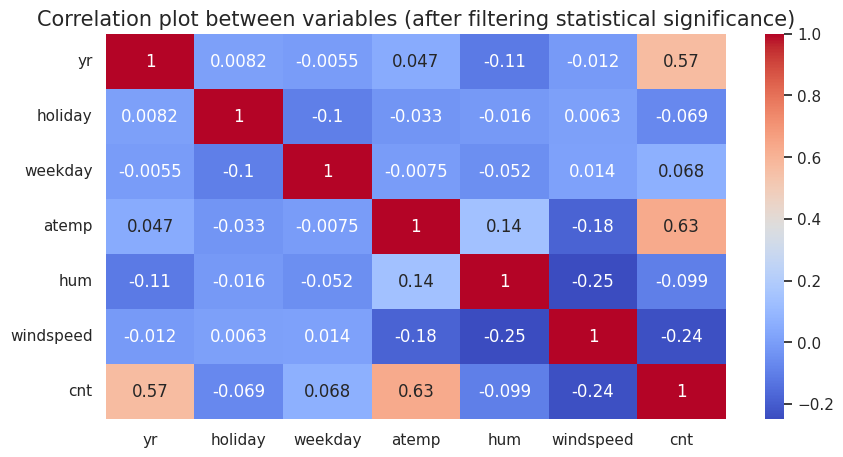

In [66]:
corr = df_f.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="coolwarm")
plt.title("Correlation plot between variables (after filtering statistical significance)", fontsize=15)